In [2]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
import pandas as pd


data = pd.read_csv('dataset.csv')
data.head()
# One-hot encoding of the 'region' variable
data_encoded = pd.get_dummies(data, columns=['region'])
data_encoded.head()
data_encoded.dtypes



age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

In [3]:
# Converting boolean columns to integers
data_encoded_bool_to_int = data_encoded.copy()
data_encoded_bool_to_int['region_northeast'] = data_encoded_bool_to_int['region_northeast'].astype(int)
data_encoded_bool_to_int['region_northwest'] = data_encoded_bool_to_int['region_northwest'].astype(int)
data_encoded_bool_to_int['region_southeast'] = data_encoded_bool_to_int['region_southeast'].astype(int)
data_encoded_bool_to_int['region_southwest'] = data_encoded_bool_to_int['region_southwest'].astype(int)

# Checking the data types again
data_encoded_bool_to_int.dtypes


age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast      int64
region_northwest      int64
region_southeast      int64
region_southwest      int64
dtype: object

In [4]:
# Re-running the regression analysis and Cook's distance calculation
X_bool_to_int = data_encoded_bool_to_int.drop('charges', axis=1)
y_bool_to_int = data_encoded_bool_to_int['charges']

# Adding a constant to the model (for statsmodels)
X_const_bool_to_int = sm.add_constant(X_bool_to_int)

# Fitting the linear regression model
model_bool_to_int = sm.OLS(y_bool_to_int, X_const_bool_to_int).fit()

# Calculating Cook's distance
influence_bool_to_int = model_bool_to_int.get_influence()
cooks_d_bool_to_int = influence_bool_to_int.cooks_distance[0]

# Attaching Cook's distance to the original data
data_with_cooks_bool_to_int = data.copy()
data_with_cooks_bool_to_int['cooks_distance'] = cooks_d_bool_to_int

# Showing a summary of Cook's distances
cooks_summary_bool_to_int = data_with_cooks_bool_to_int.sort_values(by='cooks_distance', ascending=False).head()
cooks_summary_bool_to_int.head()


,age,sex,bmi,children,smoker,region,charges,cooks_distance
543,54,1,47.410,0,1,southeast,63770.42801,0.017864
1299,45,0,30.360,0,1,southeast,62592.87309,0.017164
577,31,1,38.095,1,1,northeast,58571.07448,0.016593
818,33,1,35.530,0,1,northwest,55135.40209,0.013397
1229,52,0,34.485,3,1,northwest,60021.39897,0.012874


NameError: name 'cooks_summary' is not defined

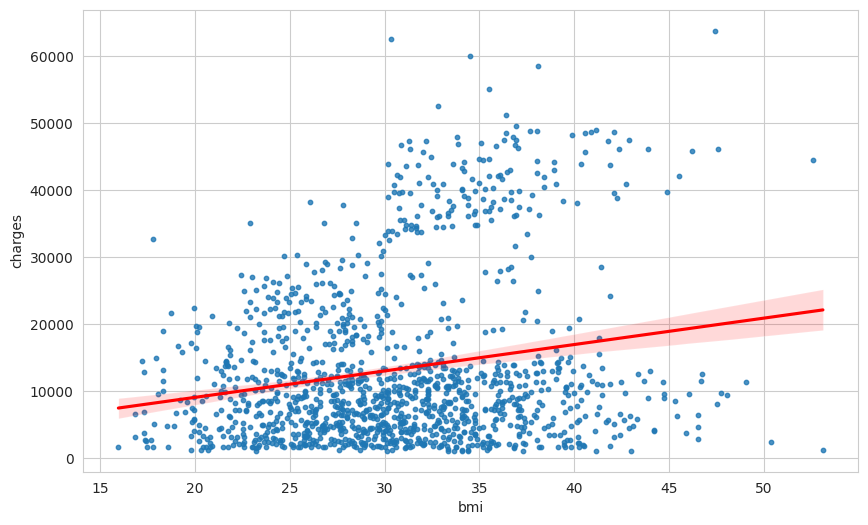

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plot
sns.set_style("whitegrid")

# Plotting the linear regression
plt.figure(figsize=(10, 6))

# Using Seaborn to plot the linear regression and fit line
sns.regplot(x='bmi', y='charges', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Annotating the top 10 influential points based on Cook's distance
for index in cooks_summary.index:
    plt.text(data.at[index, 'bmi'], data.at[index, 'charges'], str(index))

plt.title('Linear Regression with Annotated Influential Points (Cook\'s Distance)')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.show()